In [1]:
import numpy as np
import tensorflow as tf
import mglearn
import matplotlib.pyplot as plt

# 대부분의 머신러닝 문제는 classification 아니면 regression

## Linear Classification

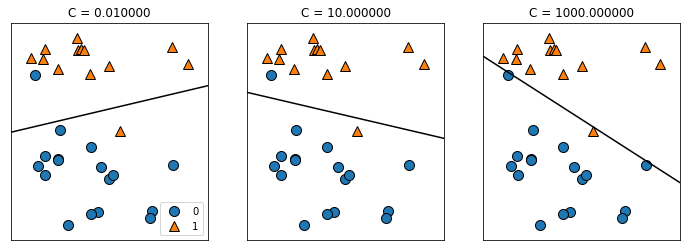

In [2]:
mglearn.plots.plot_linear_svc_regularization()

## FYI, regression is ...

w[0]: 0.393906  b: -0.031804


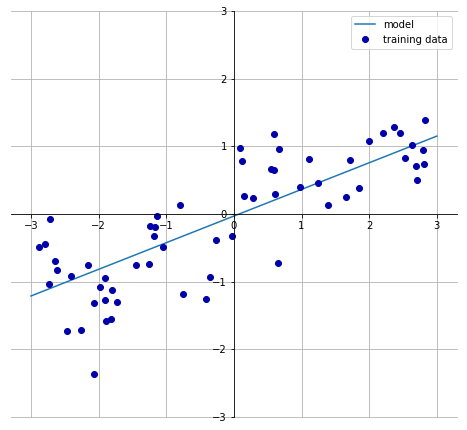

In [3]:
mglearn.plots.plot_linear_regression_wave()

## Linear classification/regression

$n$개의 feature가 있을 때, $f_{1}, f_{2}, \cdots, f_{n}$라고 하면,

$y = c_{1}f_{1} + c_{2}f_{2} + \cdots + c_{n}f_{n} + b$

$c_{i}$ : coefficients

$b$ : bias (constant)

Classification 문제에서는 **$y >= 0$ or not** 으로 구분

# Multi-class problem

In [4]:
from sklearn.datasets import make_blobs
X, Y = make_blobs(random_state=42, n_samples=100)
X_train, Y_train = X[:80], Y[:80]
X_test, Y_test = X[80:], Y[80:]

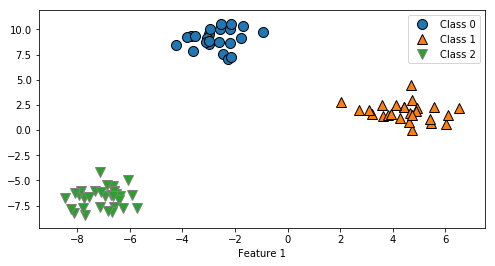

In [5]:
plt.rcParams["figure.figsize"] = [8, 4]

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], Y_train)
plt.xlabel('Feature 0')
plt.xlabel('Feature 1')
plt.legend(['Class 0', 'Class 1', 'Class 2'])

In [6]:
X_train.shape, Y_train.shape

((80, 2), (80,))

In [7]:
Y_train

array([2, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2,
       2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0,
       0, 1, 2, 2, 2, 1, 1, 1, 0, 2, 2, 2, 0, 0, 1, 0, 2, 1, 2, 1, 2, 2,
       1, 2, 1, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1])

In [9]:
g = tf.Graph()
with g.as_default():
    x = tf.placeholder(tf.float32, [None, 2])  # 2 features
    y = tf.placeholder(tf.int64, [None])  # answers (integers)
    
    W = tf.Variable(tf.random_normal(shape=[2, 3]))
    b = tf.Variable(tf.random_normal(shape=[3]))
    pred = tf.nn.xw_plus_b(x, W, b)
    
    cost = tf.losses.sparse_softmax_cross_entropy(labels=y, logits=pred)
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
    
    pred_int = tf.argmax(pred, 1)
    correct_prediction = tf.equal(pred_int, y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## W: a matrix, b: a vector

Input($80 \times 2$) * $W$($2 \times 3$) + $b$($3$) = Output($80 \times 3$)

첫 번째 샘플을 $x$라고 하면, $x$는 두 개의 feature를 가진다: $x_{1}, x_{2}$

$y_{1} = x_{1}W_{1,1} + x_{2}W_{2,1} + b_{1}$

$y_{2} = x_{1}W_{1,2} + x_{2}W_{2,2} + b_{2}$

$y_{3} = x_{1}W_{1,3} + x_{2}W_{2,3} + b_{3}$

각 샘플에 대해 3개의 결과($y_{i}$)가 나온다.

### softmax? (normalized exponential function)

$e^{i} / \sum_{k}e^{k}$




In [10]:
samples = np.random.randn(5)
samples

array([ 1.26914459, -2.23919891,  1.19281311, -0.11968859,  1.48734335])

In [11]:
ps = np.exp(samples)
softmax = ps / np.sum(ps)
softmax

array([0.28988399, 0.008681  , 0.26858013, 0.07228724, 0.36056764])

In [12]:
np.sum(softmax)

1.0

## Cross-entropy?

$H(p, q) = - \sum_x p(x) \log q(x)$

$p$: 정답 분포

$q$: 예측 분포

### entropy
$- \sum_x p(x) \log p(x)$

정답 분포에 가깝도록 학습!

두 분포의 차를 KL(Kullback–Leibler) divergence로 표현하기도 한다.

$D_{KL}(p||q) = \sum_i p(i) \log \frac{p(i)}{q(i)}$ > 0

$H(p, q) = H(p) + D_{KL}(p||q)$

In [20]:
answer = np.array([0.01, 0.01, 0.96, 0.01, 0.01])  # 보통 one-hot encoding으로 표현하나, 예제에서는 log 0는 없으므로 0.01씩 배분

np.sum(answer)

1.0

In [14]:
-np.sum(answer * np.log(answer))

0.22339592217896861

In [15]:
-np.sum(answer * np.log(softmax))

1.358342486187935

In [16]:
near = np.array([0.1, 0.1, 0.6, 0.1, 0.1])
-np.sum(answer * np.log(near))

0.5824960025351129

정답 분포에 가깝게 학습한다는 것은 cross-entropy를 최소화 시키는 것(KL divergence를 0으로 만드는 것).

### Gradient Descent

#### Mini-batch

#### Optimization
- SGD with momentum, Nesterov momentum
- Adagrad
- RMSProp (by Hinton)
- Adam
- ...

## Train and Evaluation

In [21]:
BATCH_SIZE = 10
N_EPOCH = 100

with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())

    for epoch in range(N_EPOCH):
        epoch_cost = 0.
        for _ in range(len(X_train) // BATCH_SIZE):
            choice = np.random.choice(len(X_train), BATCH_SIZE)
            batch_xs, batch_ys = X_train[choice], Y_train[choice]
            _, c = sess.run([optim, cost], feed_dict={x: batch_xs, y: batch_ys})
            epoch_cost += c
        if (epoch + 1) % (N_EPOCH // 10) == 0:
            print("Epoch:", '%02d' % (epoch+1), "cost={}".format(epoch_cost))

    w_internal, b_internal, answers, prediction, acc = sess.run([W, b, y, pred_int, accuracy], feed_dict={x: X_test, y: Y_test})
    print("Accuracy:", acc)
    print("W:", w_internal)
    print("b:", b_internal)
    print("Answers   :", answers)
    print("Prediction:", prediction)

Epoch: 10 cost=0.3977000042796135
Epoch: 20 cost=0.22483990713953972
Epoch: 30 cost=0.2288754340261221
Epoch: 40 cost=0.14392743166536093
Epoch: 50 cost=0.08723273687064648
Epoch: 60 cost=0.11420928640291095
Epoch: 70 cost=0.11490179458633065
Epoch: 80 cost=0.09618064761161804
Epoch: 90 cost=0.08253804594278336
Epoch: 100 cost=0.0442984108813107
Accuracy: 1.0
W: [[-0.49219394  0.56784284 -0.47962168]
 [ 1.1215134   0.65027446  0.215538  ]]
b: [-0.25494608  1.0000831   0.4160725 ]
Answers   : [0 1 0 2 0 0 0 1 0 1 1 1 0 1 0 0 0 1 2 0]
Prediction: [0 1 0 2 0 0 0 1 0 1 1 1 0 1 0 0 0 1 2 0]


## show borders

$y = ux_{1} + vx_{2} + b$
$vx_{2} = y - ux_{1} - b$

$x_{2} = \frac{y - ux_{1} - b}{v}$

$x_{2} = \frac{- ux_{1} - b}{v}$ where $y = 0$

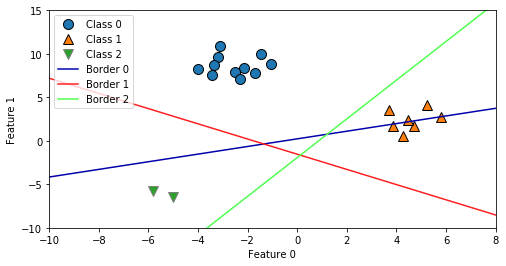

In [22]:
mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], Y[80:100])
line = np.linspace(-15, 15)
for coef, bias, color in zip(w_internal.transpose(), b_internal, mglearn.cm3.colors):
    plt.plot(line, -(coef[0] * line + bias) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Border 0', 'Border 1', 'Border 2'])